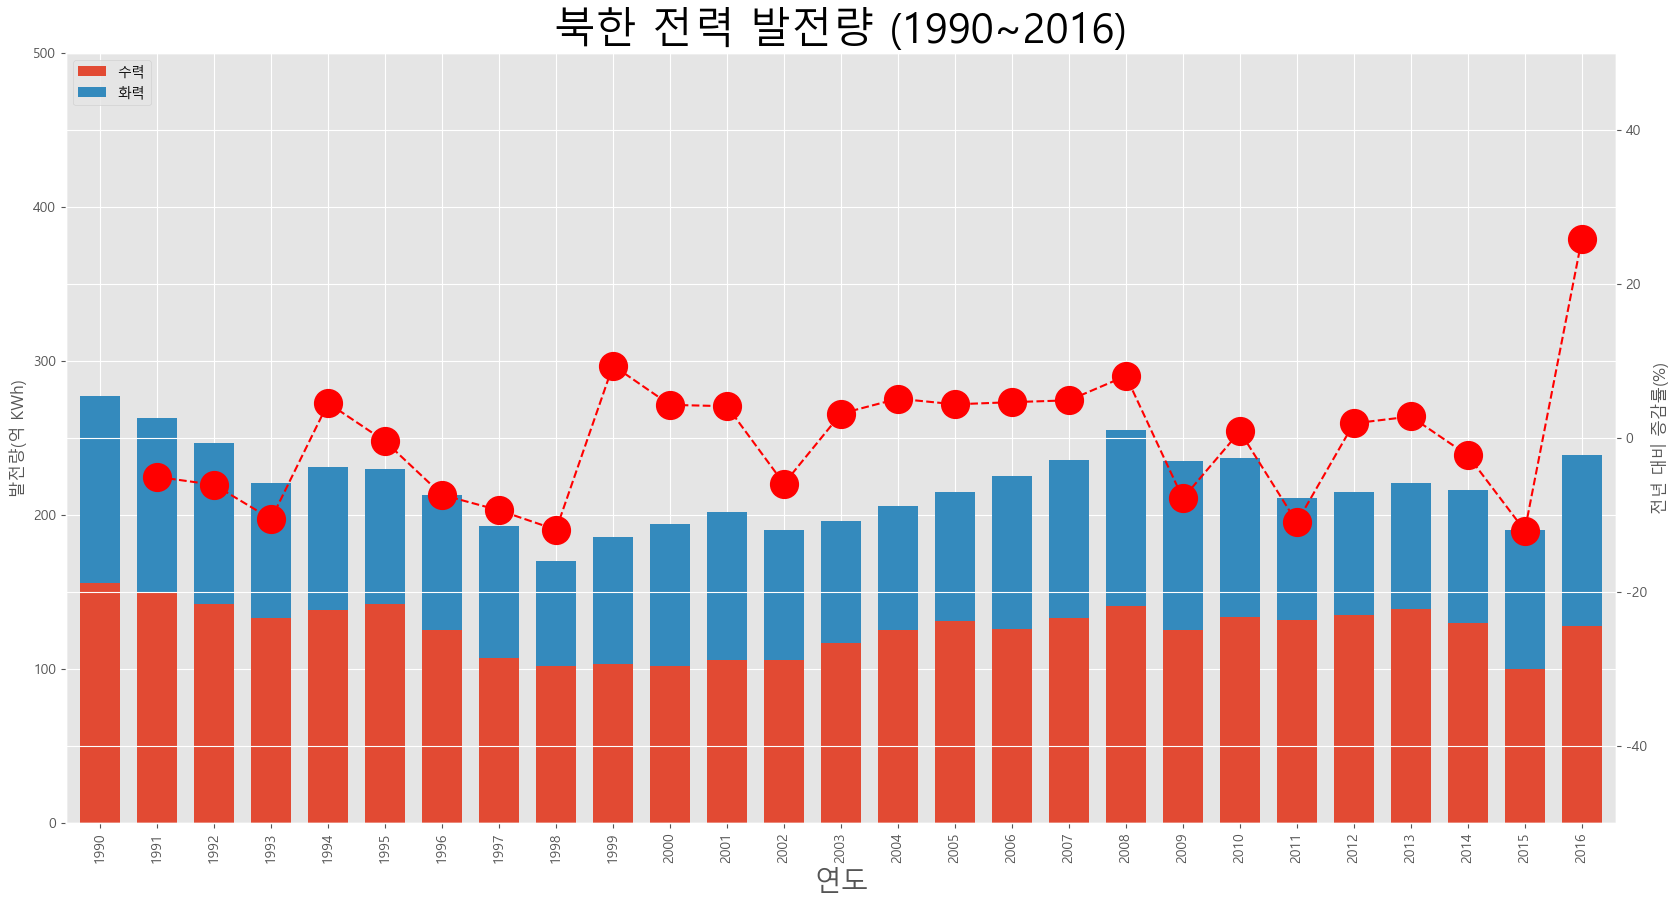

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "c:\Windows\Fonts\MALGUNSL.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_excel('./남북한발전전력량.xlsx', engine='openpyxl')
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T

df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감률'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100

ax1 = df[['수력', '화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감률, ls='--', marker='o', markersize=20, color='red', label='전년대비 증감률(%)')

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감률(%)')

plt.title('북한 전력 발전량 (1990~2016)', size=30)
ax1.legend(loc='upper left')

plt.show()

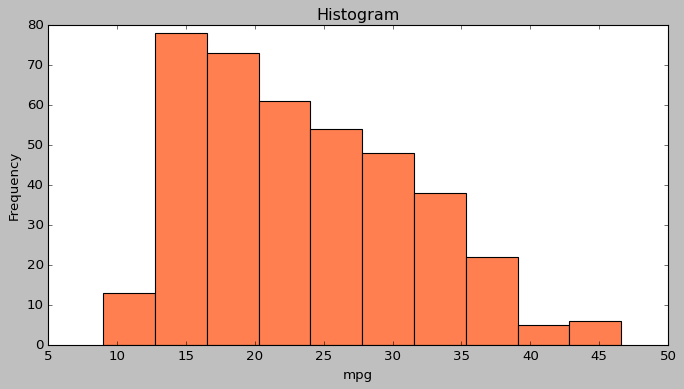

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic')

df = pd.read_csv('./auto-mpg.csv', header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year',
              'origin', 'name']

df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10, 5))

plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

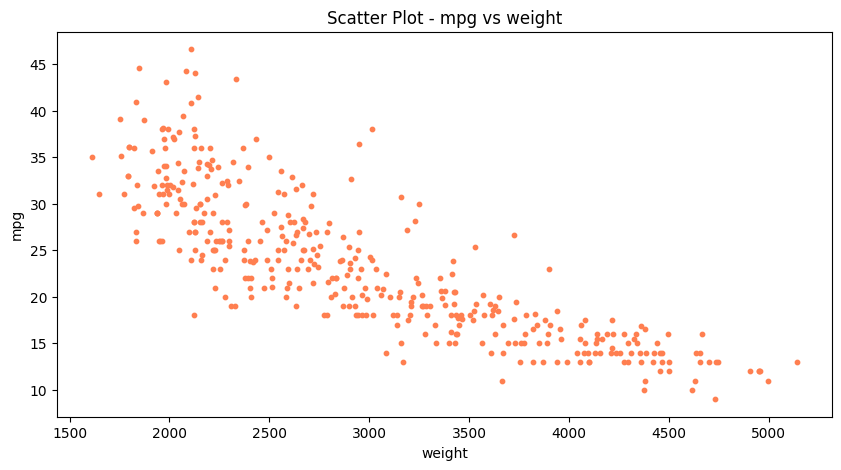

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

df = pd.read_csv('./auto-mpg.csv', header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year',
              'origin', 'name']

df.plot(kind = 'scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))

plt.title('Scatter Plot - mpg vs weight')
plt.show()

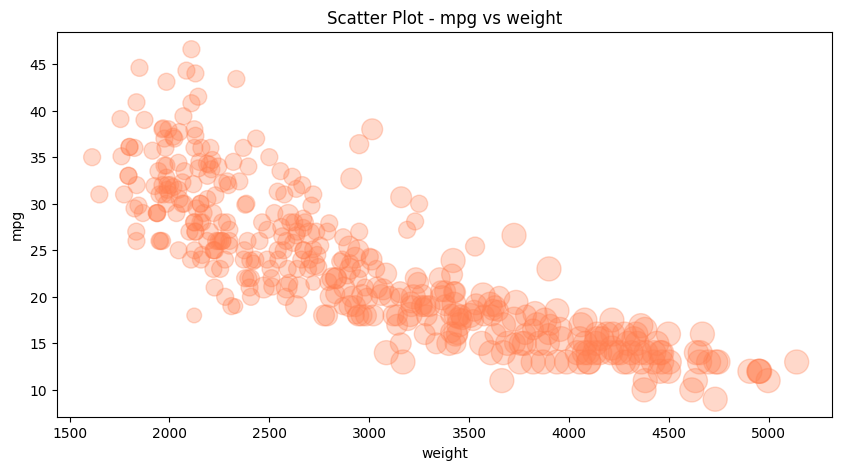

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

df = pd.read_csv('./auto-mpg.csv', header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year',
              'origin', 'name']

cylinders_size = df.cylinders/df.cylinders.max() * 300

df.plot(kind = 'scatter', x='weight', y='mpg', c='coral', s=cylinders_size, figsize=(10, 5), alpha = 0.3)

plt.title('Scatter Plot - mpg vs weight')
plt.show()

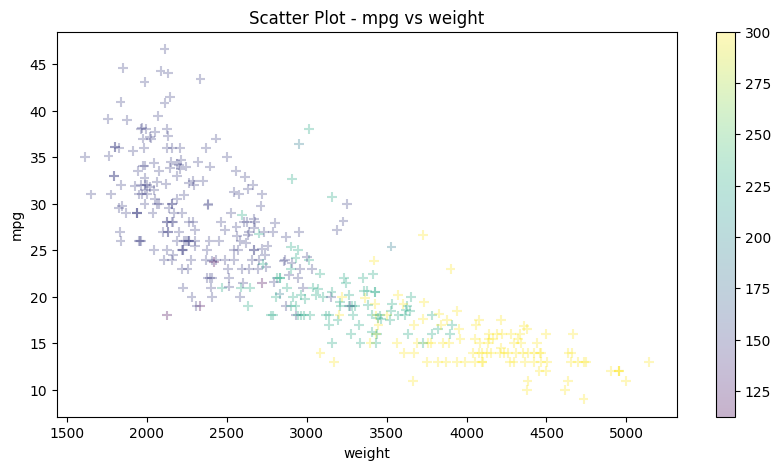

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

df = pd.read_csv('./auto-mpg.csv', header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year',
              'origin', 'name']

cylinders_size = df.cylinders/df.cylinders.max() * 300

df.plot(kind = 'scatter', x='weight', y='mpg', marker='+', s=50, c=cylinders_size, figsize=(10, 5), cmap='viridis', alpha = 0.3)

plt.title('Scatter Plot - mpg vs weight')

plt.savefig("./scatter.png")
plt.savefig("./scatter_transparent.png", transparent=True)
plt.show()

           mpg  cylinders  displacement  \
origin                                    
1       5000.8       1556       61229.5   
2       1952.4        291        7640.0   
3       2405.6        324        8114.0   

                                               horsepower    weight  \
origin                                                                
1       130.0165.0150.0150.0140.0198.0220.0215.0225.01...  837121.0   
2       46.0087.0090.0095.00113.090.0070.0076.0060.005...  169631.0   
3       95.0088.0088.0095.0065.0069.0095.0097.0092.009...  175477.0   

        acceleration  model year  \
origin                             
1             3743.4       18827   
2             1175.1        5307   
3             1277.6        6118   

                                                     name  count  
origin                                                            
1       chevrolet chevelle malibubuick skylark 320plym...    249  
2       volkswagen 1131 deluxe sedanpeugeot 50

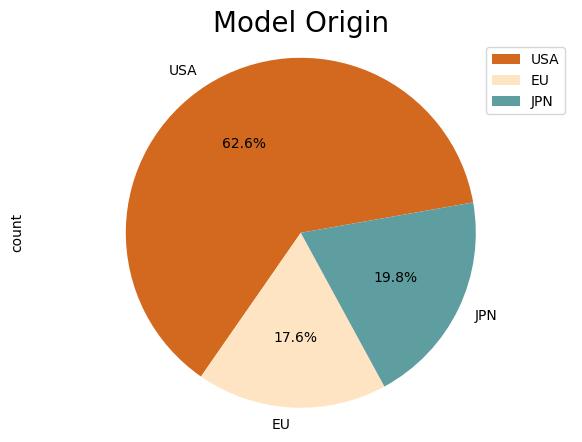

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

df = pd.read_csv('./auto-mpg.csv', header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year',
              'origin', 'name']

df['count'] = 1
df_origin = df.groupby('origin').sum()
print(df_origin.head())

df_origin.index = ['USA', "EU", "JPN"]

df_origin['count'].plot(kind='pie', figsize=(7,5), autopct='%1.1f%%',
                        startangle=10,
                        colors=['chocolate', 'bisque', 'cadetblue'])

plt.title('Model Origin', size=20)
plt.axis('equal')
plt.legend(labels=df_origin.index, loc='upper right')

In [4]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

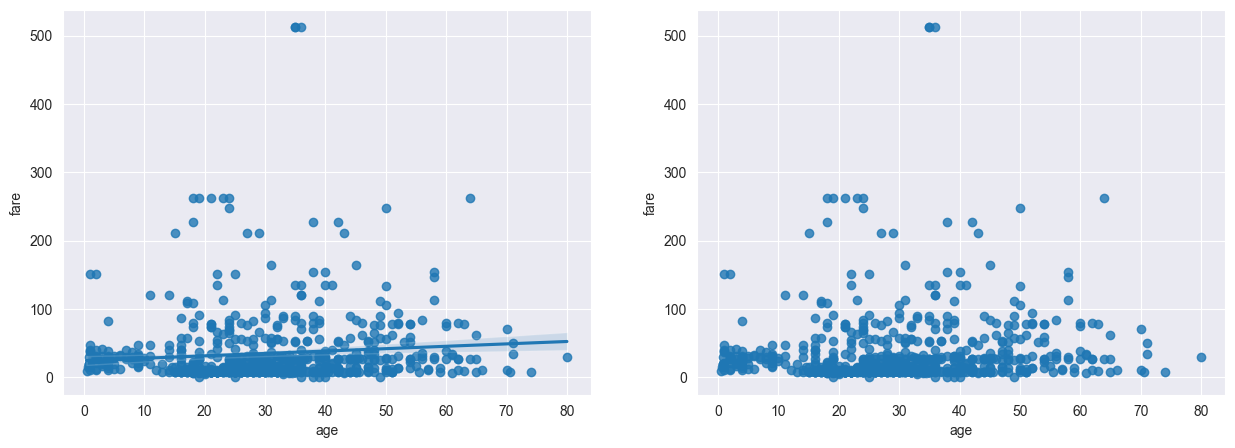

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('darkgrid')

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.regplot(x = 'age',
            y = 'fare',
            data = titanic,
            ax=ax1)

sns.regplot(x = 'age',
            y = 'fare',
            data = titanic,
            ax=ax2,
            fit_reg=False)

plt.show()

C:\Users\clip9\AppData\Local\Temp\ipykernel_27756\4183497587.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'], ax=ax1)


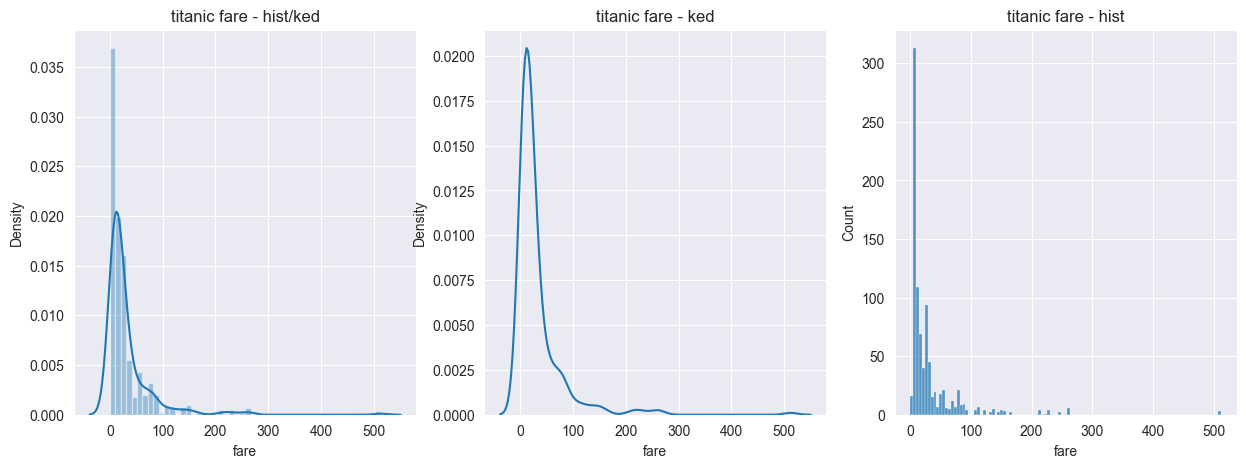

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('darkgrid')

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.distplot(titanic['fare'], ax=ax1)

sns.kdeplot(x='fare', data=titanic, ax=ax2)

sns.histplot(x='fare', data = titanic, ax=ax3)

ax1.set_title('titanic fare - hist/ked')    
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()

C:\Users\clip9\AppData\Local\Temp\ipykernel_27756\1446666699.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table = titanic.pivot_table(index = ['sex'], columns=['class'], aggfunc='size')


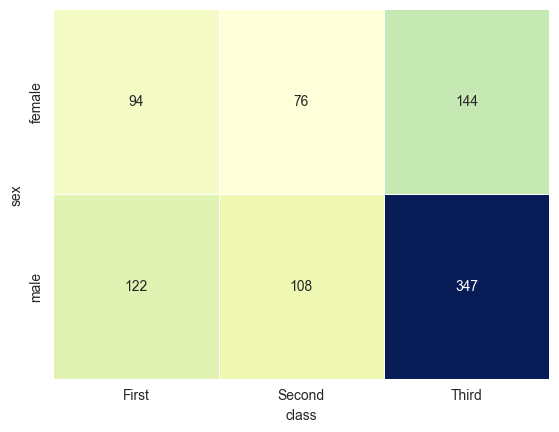

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('darkgrid')

table = titanic.pivot_table(index = ['sex'], columns=['class'], aggfunc='size')
sns.heatmap(table,
            annot=True, fmt='d',
            cmap='YlGnBu',
            linewidth=.5,
            cbar=False)

plt.show()

c:\Users\clip9\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


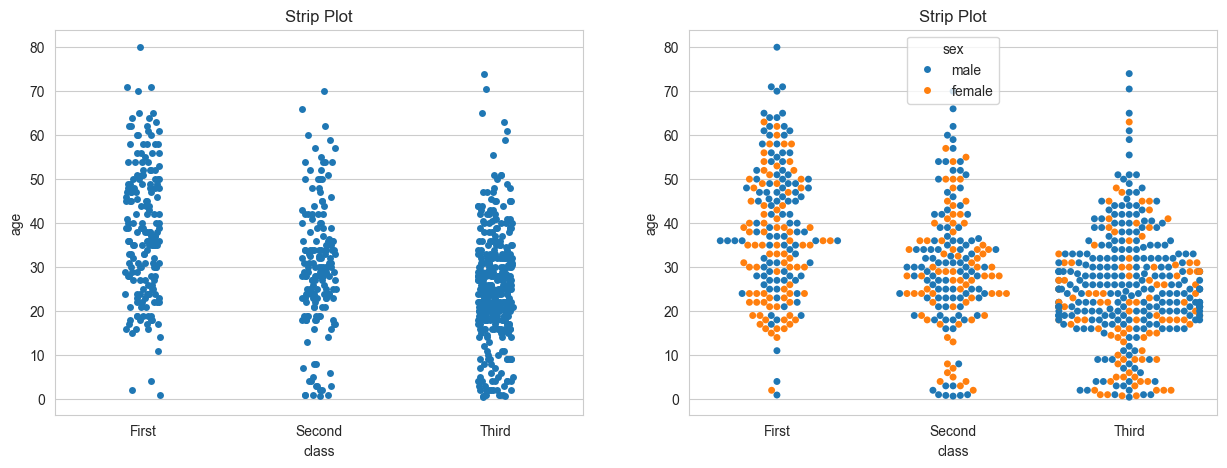

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('whitegrid')  

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.stripplot(x="class",
              y="age",
              data=titanic,
              ax=ax1)

sns.swarmplot(x="class",
              y="age",
              data=titanic,
              ax=ax2,
              hue='sex')

ax1.set_title('Strip Plot')
ax2.set_title('Strip Plot')

plt.show()

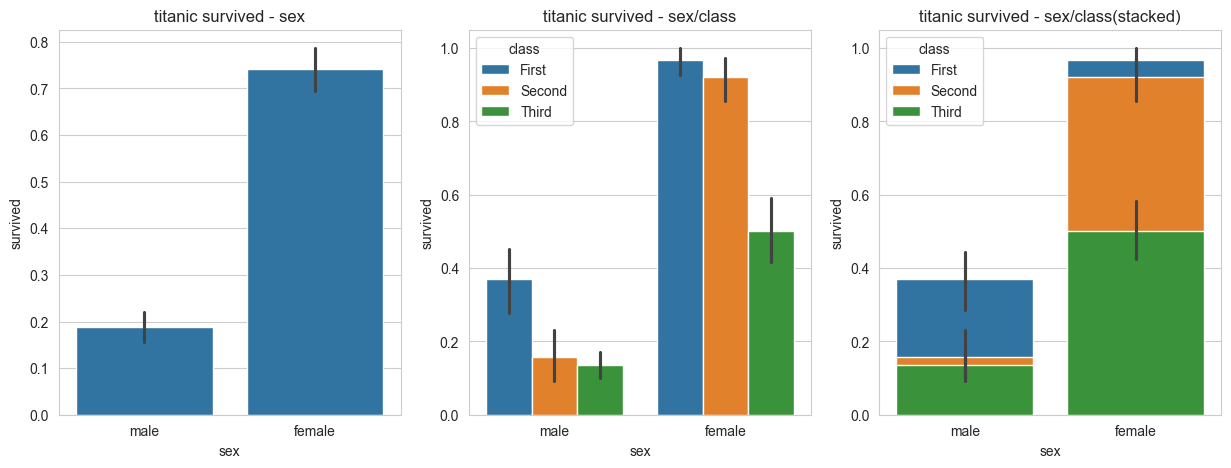

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('whitegrid')  

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.barplot(x = 'sex', y='survived', data=titanic, ax=ax1)

sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)

sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('whitegrid')  

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.barplot(x = 'sex', y='survived', data=titanic, ax=ax1)

sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)

sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

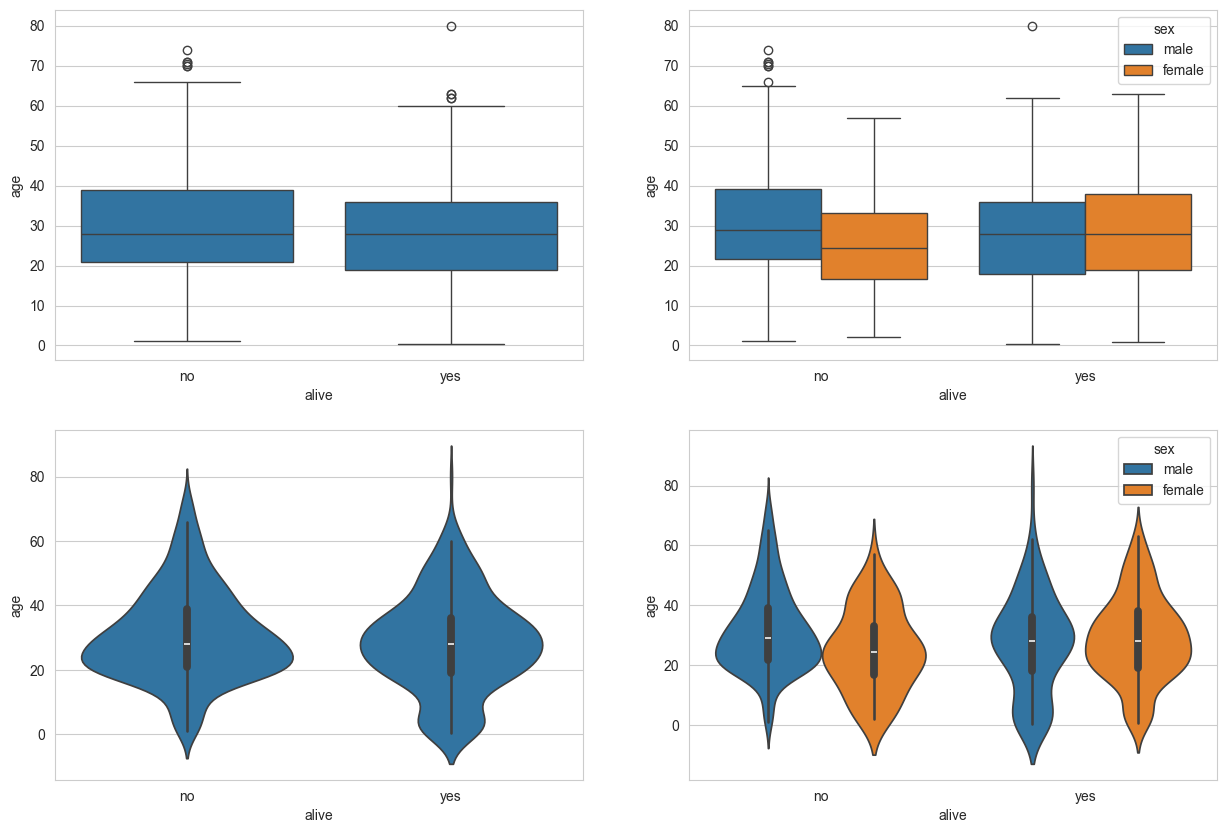

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('whitegrid')  

fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(2, 2, 1)  
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)
sns.boxplot(x='alive', y='age', hue='sex',data=titanic, ax=ax2)
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4)

plt.show()

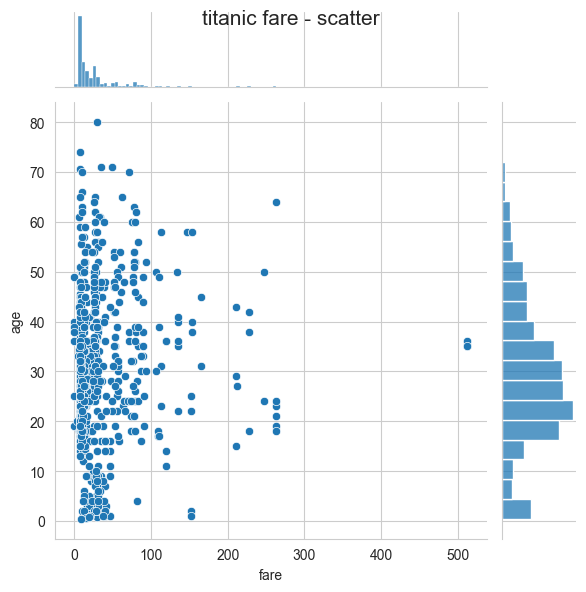

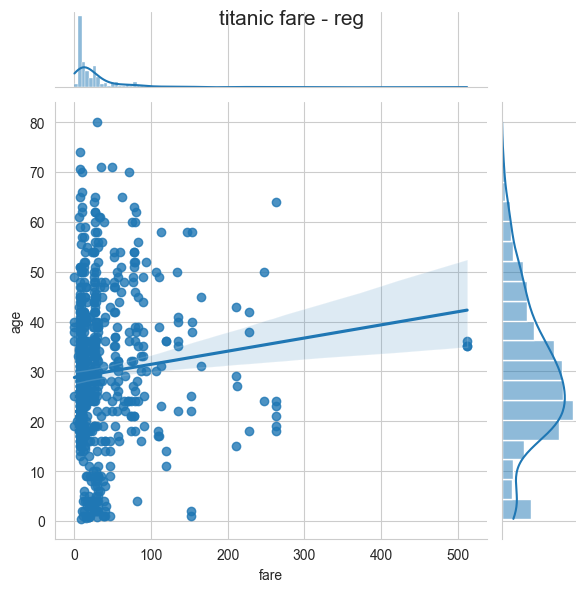

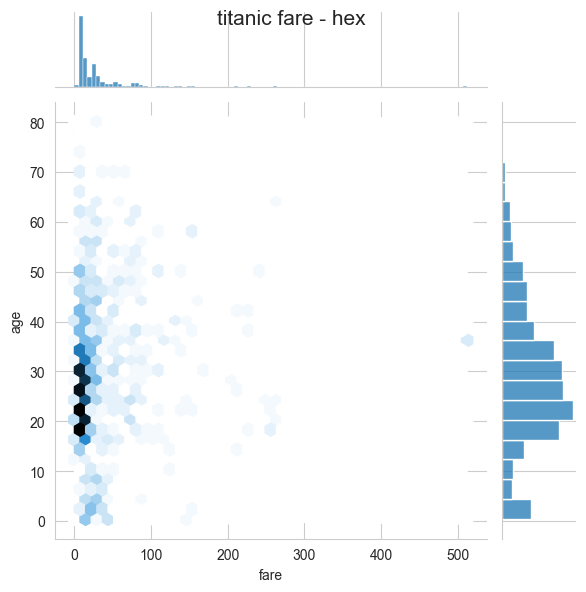

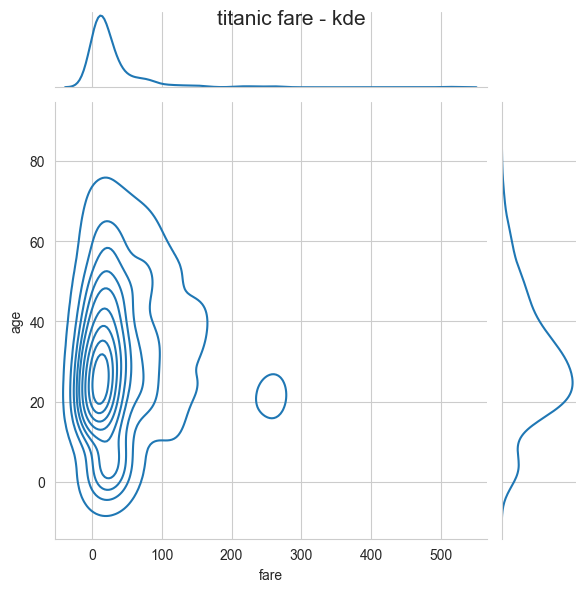

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('whitegrid')  

j1 = sns.jointplot(x='fare', y='age', data=titanic)
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic)
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic)
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic)

j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()


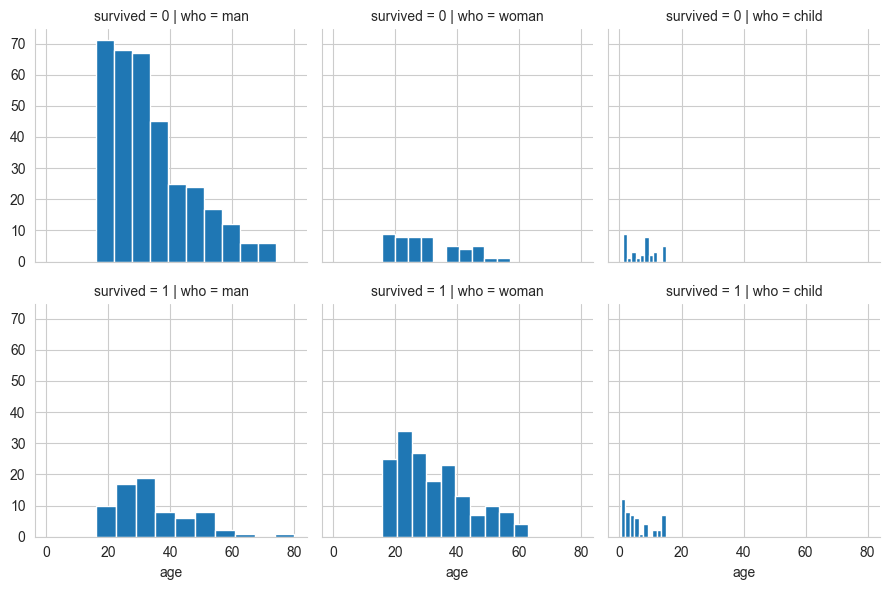

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('whitegrid')  

g = sns.FacetGrid(data=titanic, col='who', row='survived')

g = g.map(plt.hist, 'age')

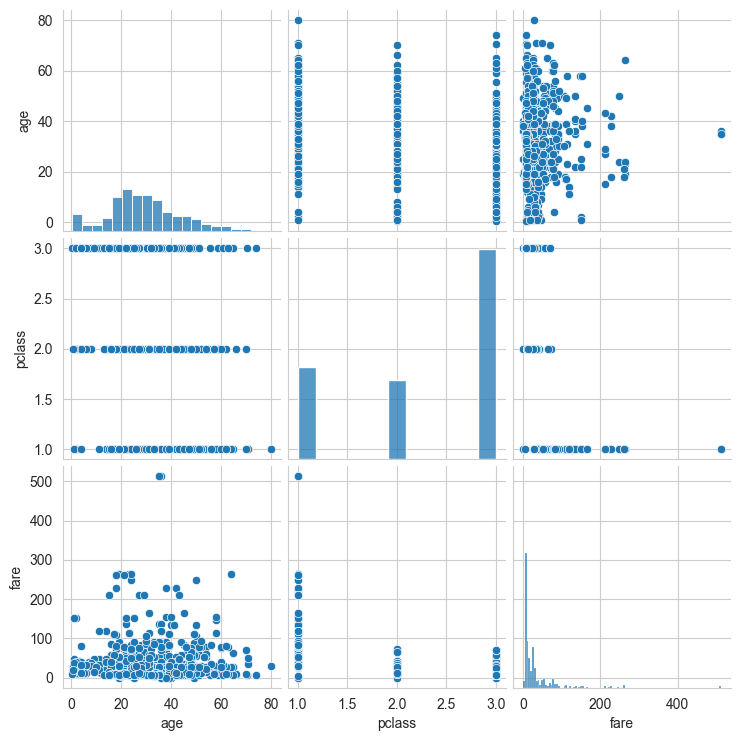

In [5]:
titanic_pair = titanic[['age', 'pclass', 'fare']]

g = sns.pairplot(titanic_pair)

In [6]:
import folium

seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=12)

seoul_map.save('./seoul.html')

In [9]:
import folium

seoul_map2 = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain',
                        zoom_start=12)  
seoul_map3 = folium.Map(location=[37.55, 126.98], tiles='Stamen Toner',
                        zoom_start=15)

seoul_map2.save('./seoul2.html')
seoul_map3.save('./seoul3.html')


ValueError: Custom tiles must have an attribution.

In [10]:
import pandas as pd
import folium

df = pd.read_excel('./서울지역 대학교 위치.xlsx', engine='openpyxl')

seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=12)

for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.Marker([lat, lng], popup=name).add_to(seoul_map)
    
    seoul_map.save('./seoul_colleges.html')

In [11]:
import pandas as pd
import folium

df = pd.read_excel('./서울지역 대학교 위치.xlsx', engine='openpyxl')

seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=12)

for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                        radius=10,
                        color='brown',
                        fill=True,
                        fill_color='coral',
                        fill_opacity=0.7,
                        popup=name).add_to(seoul_map)
    
    seoul_map.save('./seoul_colleges2.html')

In [13]:
import pandas as pd
import folium
import json 

file_path = './경기도인구데이터.xlsx'
df = pd.read_excel(file_path, index_col='구분', engine='openpyxl')

df.columns = df.columns.map(str)
geo_path = './경기도행정구역경계.json'
try:
    geo_data = json.load(open(geo_path, enconding='utf-8'))
except:
    geo_data = json.load(open(geo_path, encoding='utf-8-sig'))
    
g_map = folium.Map(location=[37.5502,126.982],
                   zoom_start=9)

year = '2017'

folium.Choropleth(geo_data=geo_data,
                  data=df[year],
                  columns=[df.index, df[year]],
                  fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                  threshold_scale=[10000, 100000, 300000, 500000, 700000],
                  key_on='feature.properties.name').add_to(g_map)

g_map.save('./gyonggi_population_'+year+'.html')


In [ ]:
3